# Eesha Awais, 22108255

**Data Mining Assignment #2**

## Step 1: Importing Dataset and EDA


### Importing Necessary Libraries:

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Importing The Dataset

In [ ]:
# Loading the data
df = pd.read_csv('/content/churn raw data (1).csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### EDA

In [ ]:
# Checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#removing columns that do not have any contribution in prediction
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 11)

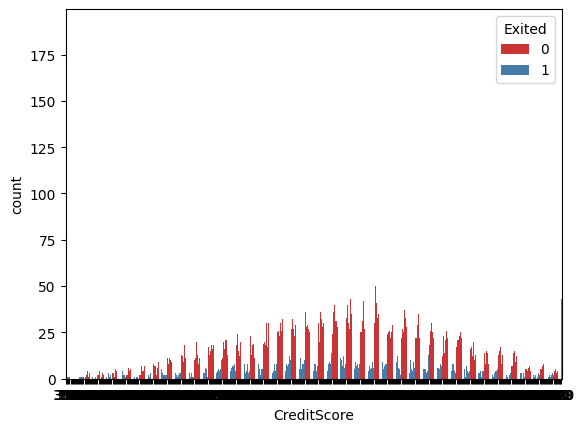

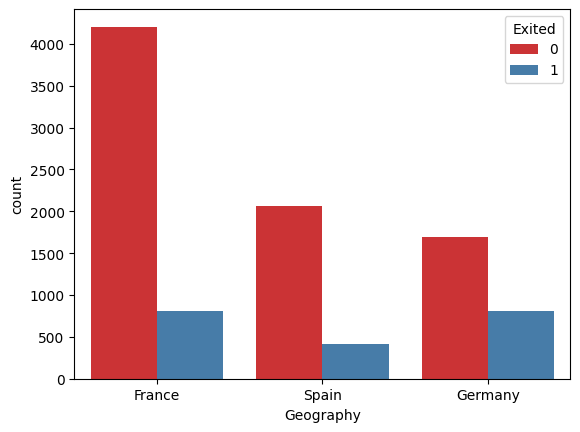

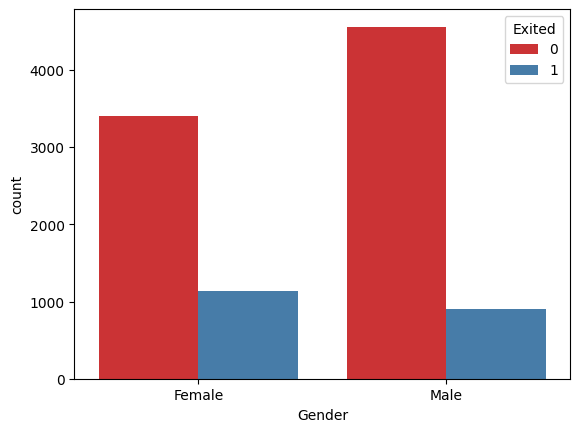

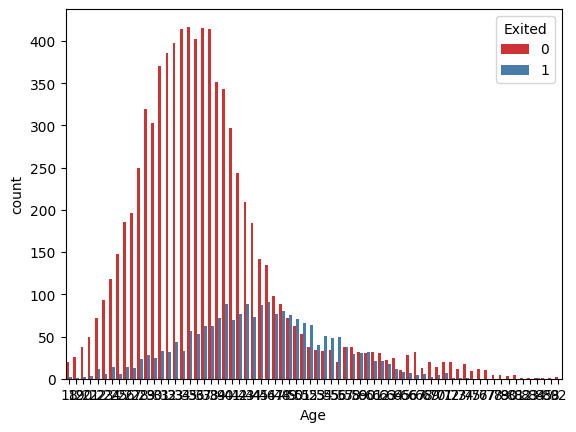

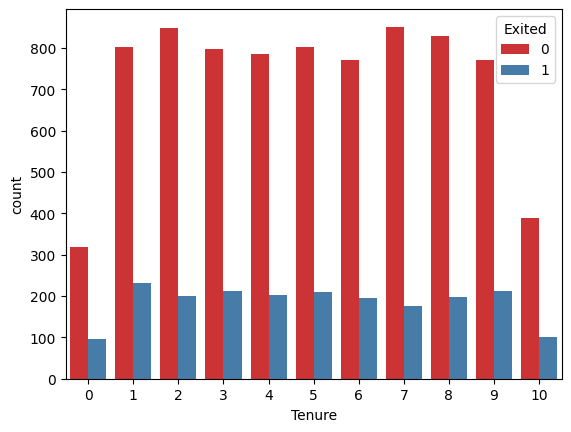

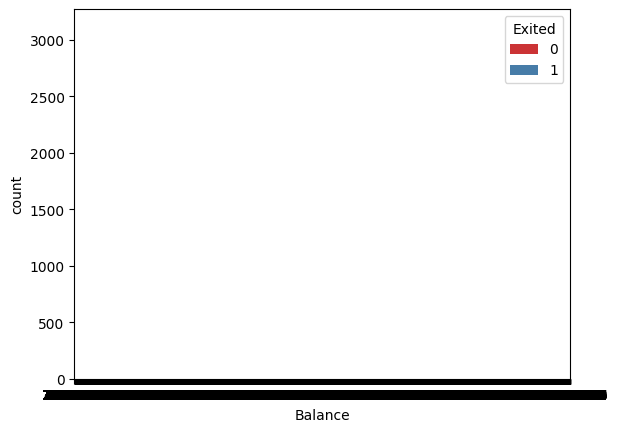

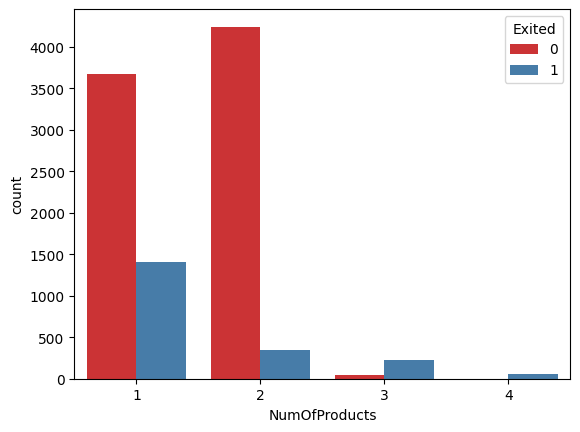

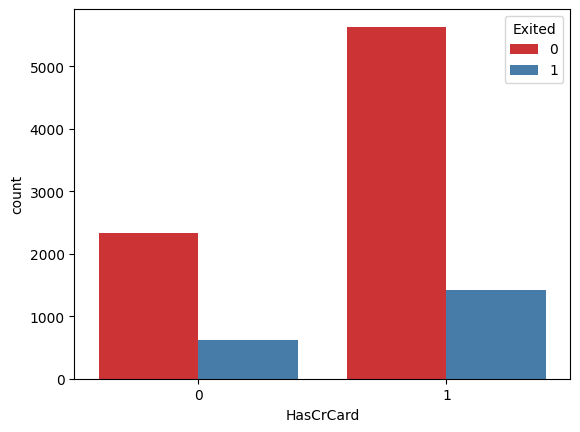

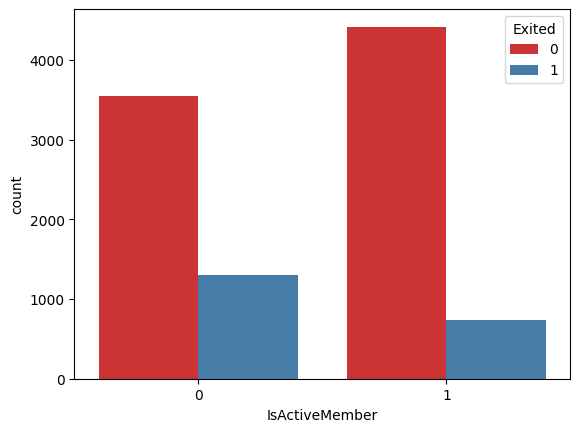

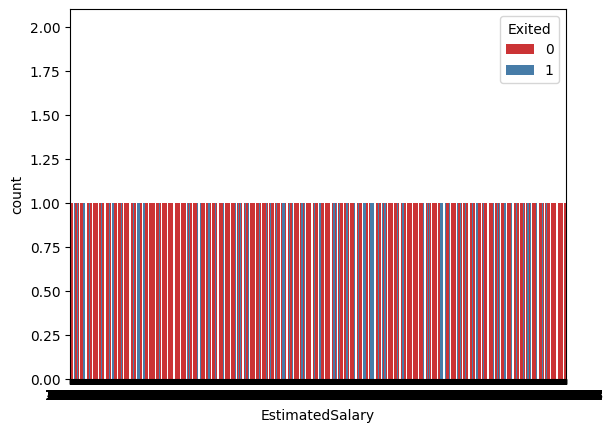

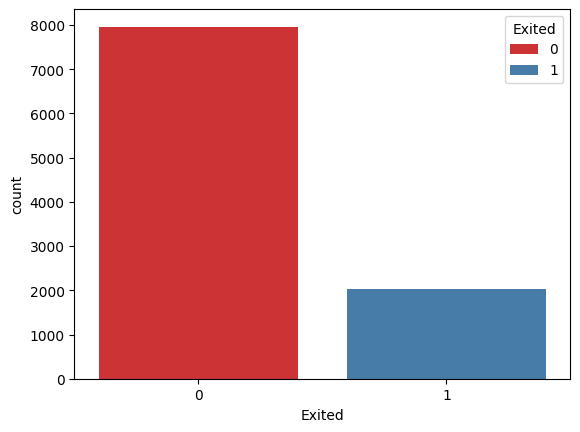

In [ ]:
features = df.columns

for i in features:
    plt.figure()
    ax = sns.countplot(x=i, data=df, hue = 'Exited', palette="Set1")

## Step 2: Data Preprocessing

### Encoding Categorical Features

In [ ]:
# Making categorical variables into numeric representation
df1 = pd.get_dummies(df, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'] )
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


### Seperating the dataset and its labels (Creating X and Y)

In [ ]:
X = df1.drop('Exited', axis=1).values
y = df1['Exited'].values

### Scaling the input features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the dataset into the Training set and Test set



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.9, test_size=0.1, random_state=0)

In [ ]:
print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(9000, 15)
y_train.shape=(9000,)
X_test.shape=(1000, 15)
y_test.shape=(1000,)


## Decision Tree Classifier

### Step 3: Fitting Decision Tree Classifier to the training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

### Step 4: Predicting the Test set results

In [ ]:
dt_pred = dt.predict(X_test)

### Making Predictions on data outside dataset

In [ ]:
k = pd.DataFrame([[598, 38, 3, 100923.5, 2, 113999.5, 0, 1, 0, 0, 1, 1 , 0, 1 , 0]],
                 columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'HasCrCard_0', 'HasCrCard_1',
                          'IsActiveMember_0', 'IsActiveMember_1'])

In [ ]:
dt.predict(k)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

###Step 5: Evaluation

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


In [ ]:
from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.822


## Naive Bayes Model

### Step 3: Fitting Naive Bayes model to the training set

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Step 4: Predicting the Test set results

In [ ]:
nb_pred = nb.predict(X_test)

### Making Predictions on data outside dataset

In [ ]:
k = pd.DataFrame([[598, 38, 3, 100923.5, 2, 113999.5, 0, 1, 0, 0, 1, 1 , 0, 1 , 0]],
                 columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'HasCrCard_0', 'HasCrCard_1',
                          'IsActiveMember_0', 'IsActiveMember_1'])

In [ ]:
nb.predict(k)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([0])

###Step 5: Evaluation

In [ ]:
# Accuracy on Train
print("Training Accuracy is: ", nb.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", nb.score(X_test, y_test))

Training Accuracy is:  0.8161111111111111
Testing Accuracy is:  0.82


In [ ]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)

Naive Bayes Accuracy: 0.82
